In [2]:
#파이썬 버전 확인
import sys
assert sys.version_info >= (3,7)

#scikit-learn 버전 확인
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

#필요한 모듈 임포트
## Path: 파일 및 디렉터리 작업을 위해 사용
## pandas: data analysis, 조작 라이브러리
## tarfile:.tar or .tar.gz file 추출
## urllib.request: URL에서 파일 다운롣,
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok = True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [3]:
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()
#housing.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


총 10개의 column
20640개의 열

#### housing.info()
*   데이터에 관한 간략한 설명을 보여줌
*   특히 전체 행 수, 각 특성의 datatype, null이 아닌 값의 개수를 확인하는데 유용함

1. total_bedrooms는 20,433개만 null이 아님 (207개의 Null)
2. ocean_proximity를 제외한 나머지 특성은 모두 float
    1. ocean_proximity는 text 특성일 것
    2. head로 확인했을 때 ocean_proximity가 반복되는 것으로 아마도 **범주형**일 것임
    3. 어떤 category가 있고, 각 category마다 얼마나 많은 구역이 있는지 확인하기 위해 ```value_counts()```로 확인

In [6]:
housing["ocean_proximity"].value_counts()
#housing["latitude"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#nuemeric 특성의 요약 정보
#null은 자동으로 제외
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#추가 코드 (고해상도 PNG file로 그래프를 저장하기 위함)
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

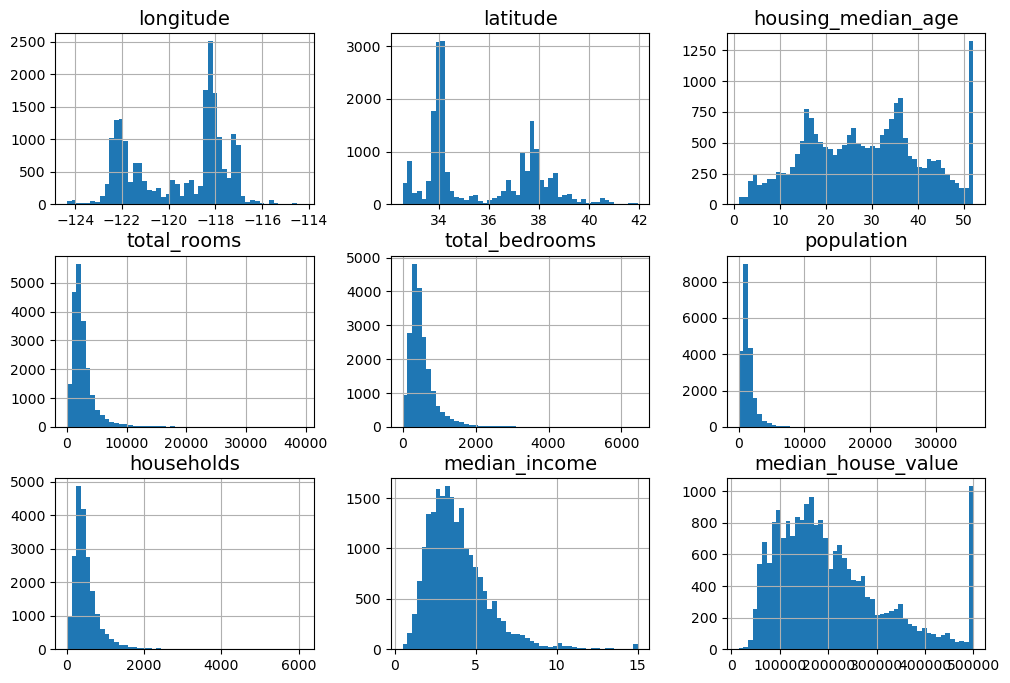

In [9]:
#numeric 특성을 빠르게 검토하는 방법은 histogram으로 데이터 형태를 살펴 보는 것
import matplotlib.pyplot as plt

# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12,8))
plt.show()

In [10]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    #np.random.permutation: 0~n-1까지의 정수를 무작위로 섞은 배열을 반환함
    #인덱스를 무작위로 배열

    test_set_size = int(len(data) * test_ratio)
    #테스트 데이터 사이즈 결정
    #데이터가 100개이고 test_ratio=0.2라면 test_set_size=20

    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    #data.iloc는 행 인덱스에 기반한 데이터 선택을 수행
    #column (특성)이 아니라 데이터를 반환해야하기 때문에 data.iloc 사용

In [11]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [12]:
print("training set = " f"{len(train_set)}" " and test set = "f"{len(test_set)}")

training set = 16512 and test set = 4128


In [13]:
#실행 결과를 일정하게 유지하기 위함
np.random.seed(42)

In [14]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()  # `index` 열 추가
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set["total_bedrooms"].isnull().sum()

44

### 계층적 샘플링
1. 미국 인구에서 1000명을 뽑는다고 가정
2. 미국인의 51.1%는 여성, 48.9%는 남성
3. 따라서, 1000명 샘플 중 511명은 여성, 489명은 남성이어야함

이때, 1000명의 랜덤 샘플에서 여성이 48.5%보다 작거나 53.3%보다 많을 확률은 10.7%

In [16]:
# 추가 코드 – 나쁜 샘플을 얻을 확률 10.7%를 계산하는 방법

from scipy.stats import binom

sample_size=1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530930072


In [17]:
# 추가 코드 – 나쁜 샘플을 얻을 확률을 시물레이션으로 계산 하는 방법

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])
#pd.cut: 연속형 데이터를 **구간(bins)**으로 나누어 범주형 데이터(categorical data)로 변환하는 데 사용
#housing의 median_income을 5개의 카테고리로 나눔

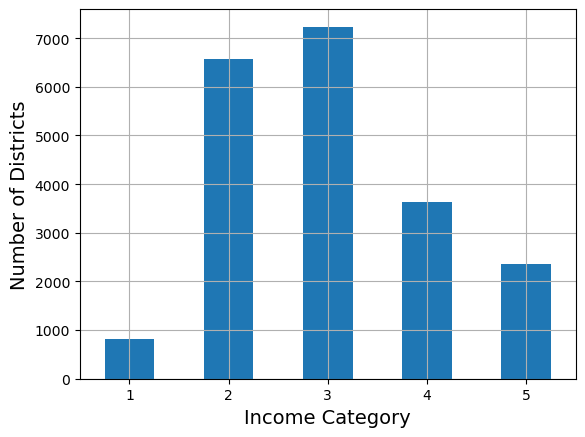

In [23]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()
# value_counts(): Return a Series containing counts of unique values.
# sort_index(): Sort Series by index labels.

- 사이킷런은 `sklearn.model_selection` 패키지 안에 여러가지 분할기 (splitter) 클래스를 제공
- 분할기: 데이터셋을 훈련세트와 테스트 세트로 분할하는 다양한 전략을 구현한 것
- 모든 분할기는 훈련과 테스트 분할에 대한 반복자를 반환하는 `split()` 메서드를 가지고 있음
- 이때 `split()` 메서드는 데이터 자체가 아니라 인덱스를 반환함

-----------

- `StartfiledShuffleSplit`은 데이터를 계층 샘플링 (층화 샘플링, Startfield Sampling) 방식으로 무작위로 나눔
- 주어진 데이터의 클래스 분포를 유지한채 훈련 세트와 테스트 세트를 생성함




In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
#StartfiledShuffleSplit은 데이터를 계층 샘플링 (층화 샘플링, Startfield Sampling) 방식으로 무작위로 나눔 
#주어진 데이터의 클래스 분포를 유지한 채 훈련 세트와 테스트 세트를 생성함

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#n_splits: 데이터를 몇 번 분할해서 분할할지 지정
#test_size: 테스트 세트의 비율 (전체 데이터의 20%를 테스트 세트로 사용)
#random_state: 결과의 재현성을 보장하기 위한 랜덤 시드 설정

'''
Generate indices to split data into training and test set.

Parameters
X : array-like of shape (n_samples, n_features)
    Training data, where n_samples is the number of samples and n_features is the number of features.

    Note that providing y is sufficient to generate the splits and hence np.zeros(n_samples) may be used as a placeholder for X instead of actual training data.

y : array-like of shape (n_samples,) or (n_samples, n_labels)
    The target variable for supervised learning problems. Stratification is done based on the y labels.
'''


strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_test_set, strat_test_set = strat_splits[0]
#이렇게 첫번째 분할을 사용할 수 있음

10

In [42]:
strat_train_set, strat_test_set = train_test_split(housing, test_size= 0.2, stratify=housing["income_cat"], random_state=42)

In [48]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [45]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [52]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

## 2.4 데이터 이해를 위한 탐색과 시각화

In [53]:
housing = strat_train_set.copy()

### 2.4.1 지리적 데이터 시각화하기
데이터 셋에 지리 정보 (위도와 경도)가 포함되어 있으므로 모든 구역을 산점도로 만들어 데이터를 시각화해보기

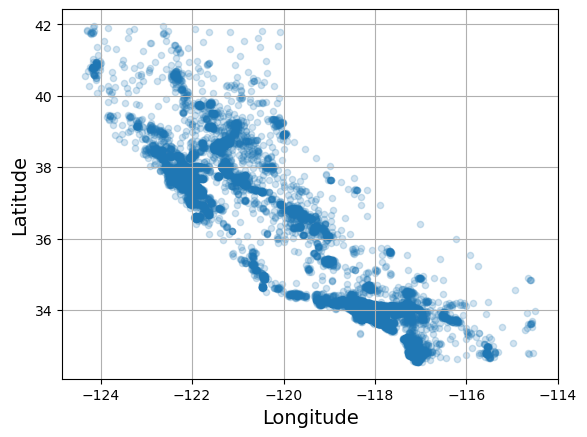

In [55]:
housing.plot(kind = "scatter", x="longitude", y = "latitude", grid = True, alpha = 0.2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

더 두드러진 패턴을 보기 위해 매개 변수를 다양하게 조절해본다.
원의 반지름은 구역의 인구를 나타내고, 색상은 가격을 나타내도록 그래프로 표현 (여기서는 미리 정의된 color map 중에서 파란색 (낮은 가격)에서 빨간색 (높은 가격)까지의 범위를 가지는 `jet`을 사용)

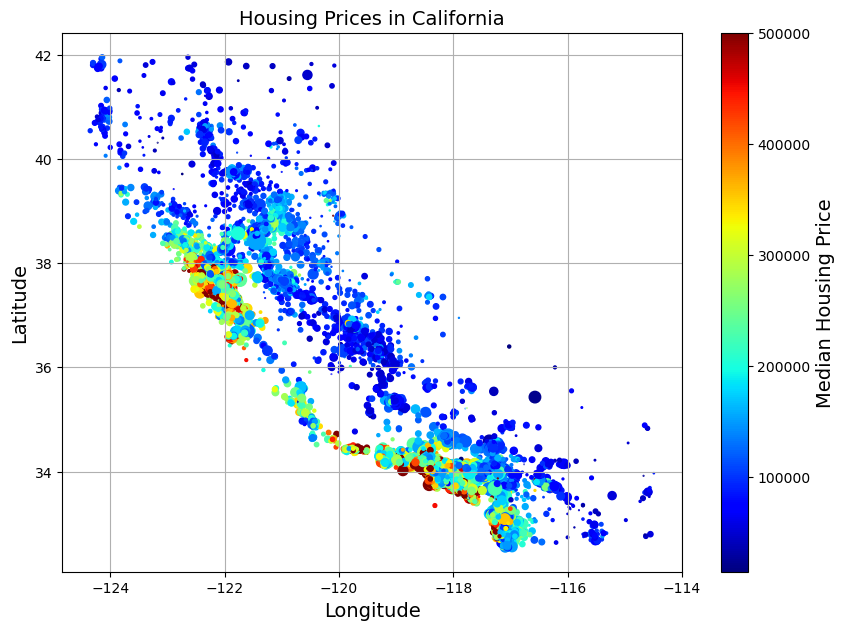

In [66]:

# 산점도 그리기
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    housing["longitude"], housing["latitude"],
    s=housing["population"]/100, 
    c=housing["median_house_value"], 
    cmap="jet"
)

# 컬러바 추가
plt.colorbar(scatter, label="Median Housing Price")

# 레이블 및 제목 설정
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices in California")

# 범례 추가 (산점도에서는 개별 범례가 어려움)
plt.grid(True)
plt.show()


### 2.4.2 상관 관계 조사하기
데이터셋이 너무 크지 않으므로 모든 특성 간의 표준 상관계수를 `corr()` 메소드를 이용해 쉽게 계산할 수 있음

In [68]:
corr_matrix = housing.corr(numeric_only= True)

In [69]:
corr_matrix["median_house_value"].sort_values(ascending = True)

latitude             -0.139584
longitude            -0.050859
population           -0.020153
total_bedrooms        0.054635
households            0.071426
housing_median_age    0.102175
total_rooms           0.137455
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

특성 사이의 상관관계를 확인하는 다른 방법은 pandas의 `scatter_matrix` 함수를 사용해 숫자형 특성 간의 산점도를 그려보는 것이다. 여기서는 숫자형의 특성이 11개이므로 총 121개의 그래프가 그려지는데, 이를 한 페이지에 모두 그리기에는 어려우므로 중간 주택 가격과 상관관계가 높아보이는 특성 몇 개만 살펴보도록 하자. 

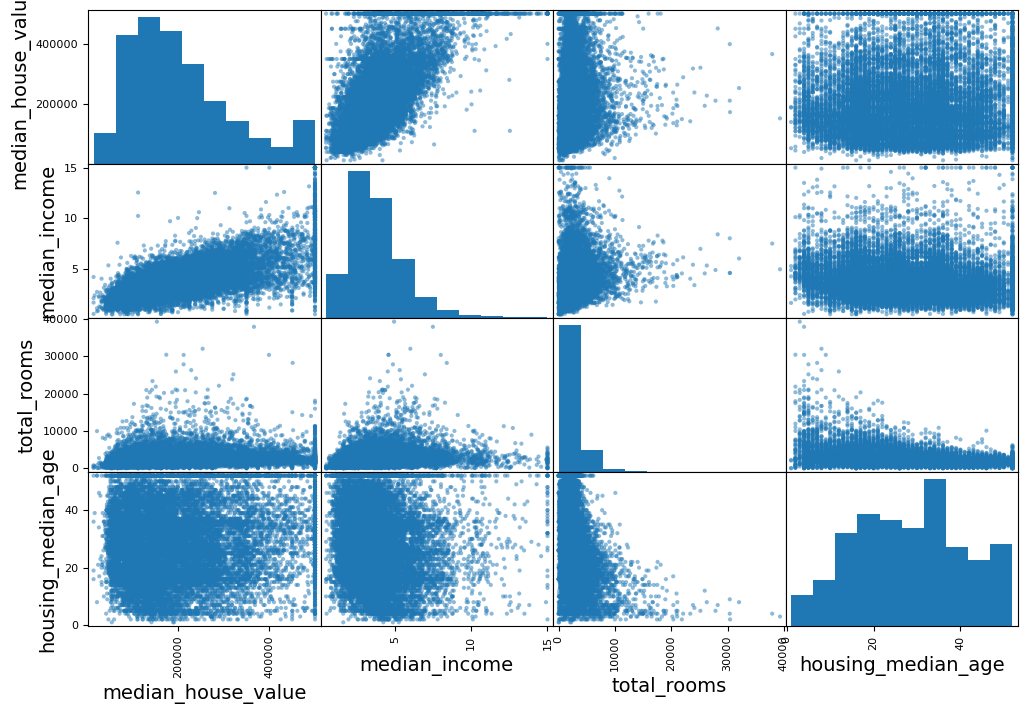

In [71]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show()